# Inconsistent behaviour of Cohen's kappa

Produces the graph from the experiment of Delgado et al (https://doi.org/10.1371/journal.pone.0222916) showing 
the inconsistent behaviour of Cohen's kappa in unbalanced confusion matrices: as the agreement of the confusion 
matrix decreases, the kappa has an inflexion point and starts counter-intuitively increasing.

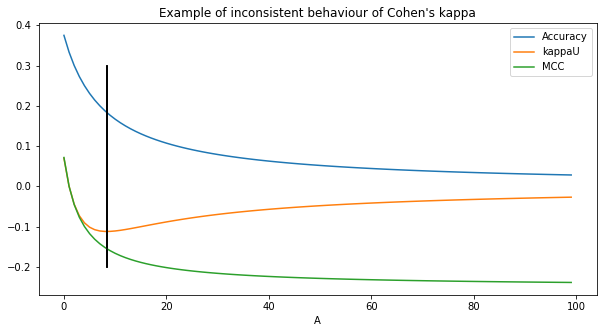

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

from metrics.classification import Accuracy, kappaU, MCC

def get_ZA(n_classes: int, a: int) -> np.array:
    """Get confusion matrix of the Z_A family (see Delgado, 2019 https://doi.org/10.1371/journal.pone.0222916)"""
    CM = np.ones((n_classes, n_classes))
    CM[0, n_classes-1] = a
    return CM

metrics = [Accuracy, kappaU, MCC]

results = {}
for metric in metrics:
    results[metric.__name__] = []
for b in range(100):
    CM = get_ZA(3, b)
    for metric in metrics:
        results[metric.__name__].append(metric(CM))

plt.figure(figsize=(10,5))
for i, metric in enumerate(metrics):
    plt.plot(results[metric.__name__], label=metric.__name__)
    plt.plot([1+3*np.sqrt(6), 1+3*np.sqrt(6)], [-0.2, 0.3], 'k-')
plt.title("Example of inconsistent behaviour of Cohen's kappa")
plt.xlabel('A')
plt.legend()
plt.show()